# Change Point Detection in Time Series Data

### What is Change Point Detection? 
Change Point Detection in Time Series Data. Change point detection is a crucial technique in time series analysis, used to identify points where the statistical properties of a data sequence change significantly. This method is widely applicable in various fields, including finance, environmental monitoring, and quality control.

The following Python code demonstrates how to perform change point detection using the ruptures library, a popular choice for analyzing changes in time series data. The code focuses on detecting significant shifts in the closing prices of Microsoft Corporation (MSFT) stock, as provided in the dataset.

### Key Components of the Code:
- Data Loading: The code begins by loading the MSFT stock data, particularly focusing on the 'Close' price column.
- Model Selection: We use the "Binary Segmentation" algorithm with the L2 norm (least squares). This model is chosen for its balance between accuracy and computational efficiency.
- Change Point Detection: The algorithm searches for a specified number of change points (n_bkps) in the data.
- Results Presentation: The detected change points are printed out, and an optional plot can be generated to visualize these points against the stock's closing prices.

### Why is it used at all? 
This approach is useful for investors and analysts looking to understand critical shifts in stock behavior, helping inform investment strategies and risk assessment.

For moe information about statistical applications: https://en.wikipedia.org/wiki/Change_detection

### Preliminary work

One popular Python library for change point detection is ruptures. Ruptures is designed for precisely this kind of analysis, offering a range of algorithms to detect change points in time-series data.

In [3]:
# pip install ruptures


In [4]:
import ruptures as rpt
import pandas as pd

In [5]:
# Load your data
data = pd.read_csv('MSFT.csv')


In [6]:
# We'll focus on the 'Close' column for change point detection
points = data['Close'].values

### binary segmentation method

In [7]:
# Create a change point detection model
# Here, we're using the "Binary Segmentation" algorithm
model = "l2"  # L2 norm (least squares), you can also try "l1" or "rbf"
algo = rpt.Binseg(model=model).fit(points)

# Number of change points to detect
n_bkps = 5  # for example, change this according to your needs

# Find the change points
results = algo.predict(n_bkps=n_bkps)

# Display the results
print(f"Change points at: {results}")

Change points at: [15, 25, 30, 40, 55, 61]


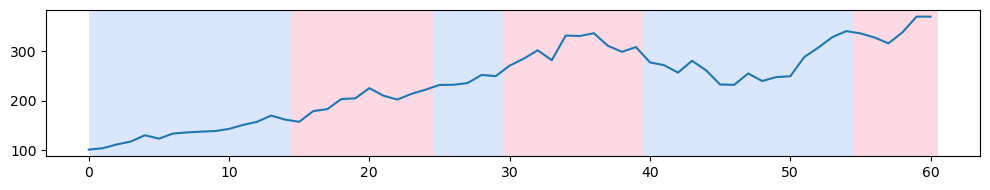

In [9]:
import matplotlib.pyplot as plt

rpt.display(points, results)
plt.show()

The output Change points at: [15, 25, 30, 40, 55, 61] from the change point detection algorithm indicates that significant changes in the time series data were detected at these indices.

### kernel change method
The RBF (Radial Basis Function) kernel is a popular choice for capturing non-linear relationships in data.
In change point detection, it helps to identify changes in the mean, variance, or other higher moments of the distribution of data.

Change points at: [11, 18, 30, 40, 52, 61]


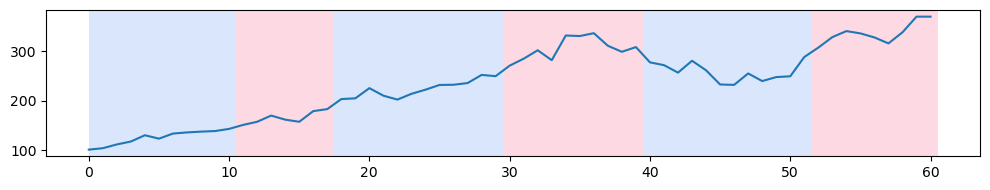

In [11]:
# Create a change point detection model using RBF kernel
model = "rbf"  
algo = rpt.KernelCPD(kernel=model).fit(points)

# Define the number of change points to detect
n_bkps = 5  # Example value, adjust as needed

# Find and display the change points
results = algo.predict(n_bkps=n_bkps)
print(f"Change points at: {results}")


rpt.display(points, results)
plt.show()

## Bottom up method
This approach is useful when you are unsure about the number of change points and want the algorithm to determine an optimal segmentation based on the data's characteristics.

Change points at: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 61]


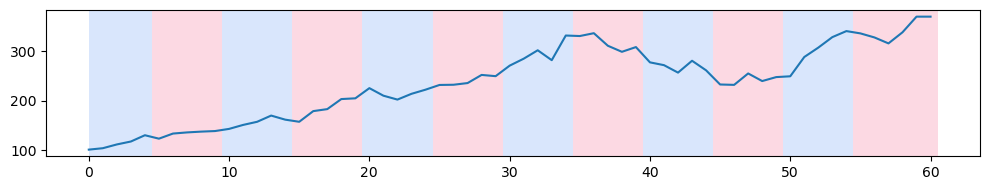

In [12]:
# Create a change point detection model using Bottom-Up algorithm
model = "l2"  # L2 norm (least squares)
algo = rpt.BottomUp(model=model).fit(points)

# Define the penalty value, which influences the number of breakpoints
penalty_value = 10  # Example value, adjust based on your data and requirements

# Find and display the change points
results = algo.predict(pen=penalty_value)
print(f"Change points at: {results}")

# Optional: Plot the results
import matplotlib.pyplot as plt

rpt.display(points, results)
plt.show()

### Pelt Method

The PELT method is ideal when you need an efficient and precise way to identify change points, especially in large time series data. The choice of penalty value is important, as it directly impacts the sensitivity of change point detection.

Change points at: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 61]


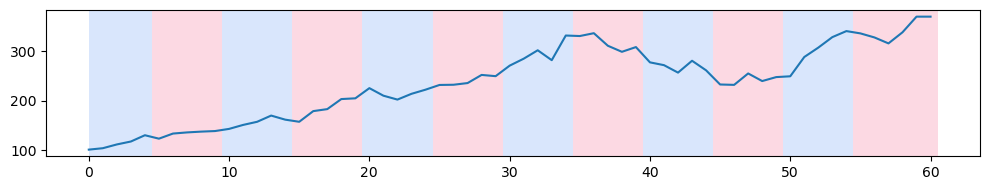

In [13]:
# Create a change point detection model using PELT algorithm
model = "l2"  # L2 norm (least squares)
algo = rpt.Pelt(model=model).fit(points)

# Define the penalty value
penalty_value = 10  # Example value, adjust based on your data and requirements

# Find and display the change points
results = algo.predict(pen=penalty_value)
print(f"Change points at: {results}")

# Optional: Plot the results
import matplotlib.pyplot as plt

rpt.display(points, results)
plt.show()

Shifts can be indicated by the following
- *Market Reactions*: To events like earnings reports, product launches, or macroeconomic changes.
- *Trend Shifts*: From bullish to bearish trends or vice versa.
- *Volatility Changes*: Periods of high or low volatility.